# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
<!-- | 10     | 30  |  3         | -->

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [25]:
import pandas as pd
from scipy.stats import pearsonr
import scipy.stats as stats
import plotly.offline as py
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

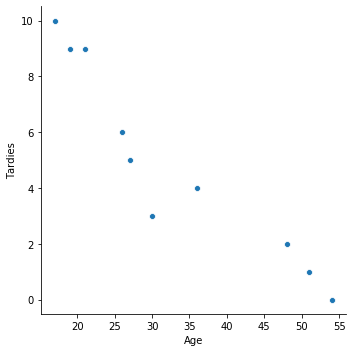

In [29]:
# Your code here.
sns.relplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# Hipotesis: Hay una correlación negativa a + edad hay menos tardanzas 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
covariance = np.cov(student_data[['Age', 'Tardies']])
corr, p = pearsonr(student_data['Age'], student_data['Tardies'])
print(f' Covariance: {covariance}')
print(f' Pearson Coefficent: {corr}, p-value:{p}')

 Covariance: [[  24.5  175.    77.    42.   112.   161.    35.    70.   189.    94.5]
 [ 175.  1250.   550.   300.   800.  1150.   250.   500.  1350.   675. ]
 [  77.   550.   242.   132.   352.   506.   110.   220.   594.   297. ]
 [  42.   300.   132.    72.   192.   276.    60.   120.   324.   162. ]
 [ 112.   800.   352.   192.   512.   736.   160.   320.   864.   432. ]
 [ 161.  1150.   506.   276.   736.  1058.   230.   460.  1242.   621. ]
 [  35.   250.   110.    60.   160.   230.    50.   100.   270.   135. ]
 [  70.   500.   220.   120.   320.   460.   100.   200.   540.   270. ]
 [ 189.  1350.   594.   324.   864.  1242.   270.   540.  1458.   729. ]
 [  94.5  675.   297.   162.   432.   621.   135.   270.   729.   364.5]]
 Pearson Coefficent: -0.939162688688712, p-value:5.566653834553479e-05


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here.
# El test de Pearson indica que las variables tienen una alta correlación negativa.
# Para esto probaremos con una regression lineal 
# La covarianza indica dirección y el grado de variación entre dos variables,
# mientras que la correlación indica tanto la dirección (signo) y como de fuerza de esta relación. 
# Cabe indicar que la covarianza tiene las unidades de las variables, mientras que la correlación es adimensional.

Plot your regression model on your scatter plot.

In [18]:
# Your code here.
x = student_data['Age']
y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(x = student_data['Age'],y = student_data['Tardies'])

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

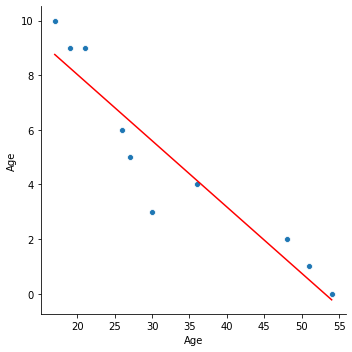

In [32]:
# Your response here. 
# Por el plot se ve que si es un buen factor de correlación, pero quizá una polinomial puede ser mas adecuada :)
y_1 = intercept + slope * x
sns.relplot(x="Age", y="Tardies", data=student_data)
sns.lineplot(x=x, y=y_1, color='red')

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

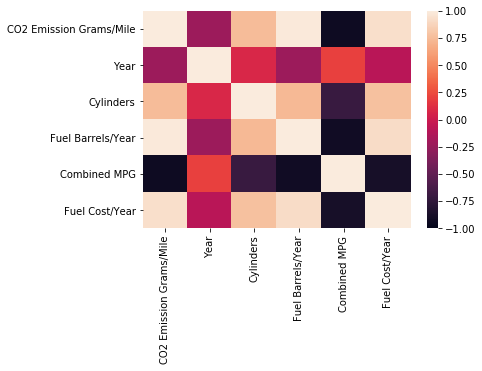

In [38]:
# Your response here. 
vehicles_filt = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
corr = vehicles_filt.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Variables más correlacionadas con CO2 Emission Grams/Mile:  
# Fuel Barrels/Year, Combined MPG, Fuel Cost/Year

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [41]:
# Your response here. 
linear_regress = LinearRegression()
x = vehicles_filt[['Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG']]
y = vehicles_filt['CO2 Emission Grams/Mile']
linear_regress.fit(x,y)
print(linear_regress.intercept_, linear_regress.coef_)

131.6741718422753 [19.69545749  0.03166095 -3.166074  ]


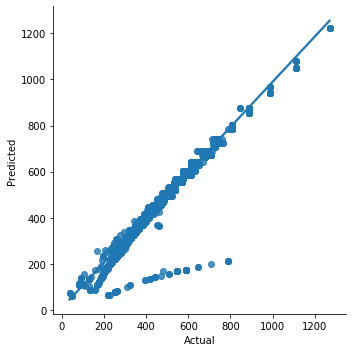

In [42]:
y_pred = linear_regress.predict(x)
sns.lmplot('Actual','Predicted', data =  pd.DataFrame({'Actual': y, 'Predicted': y_pred}))
#Podemos ver que las variables se ajustan pero hay unos outliers

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [43]:
# Your code here. 
df = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

R-squared value is : 0.9652303546573691


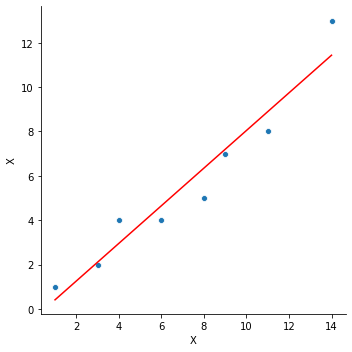

In [47]:
# Your code here.
x = df['X']
y = df['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

y_1 = intercept + slope * x

print(f'R-squared value is : {r_value}')
sns.relplot(x="X", y="Y", data=df)
sns.lineplot(x=x, y=y_1, color='red')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
# A más personas que se invite habrá mas posibilidades que la persona no asista
# Las variables tienen alta correlación

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

R-squared value is : 0.971278116825086


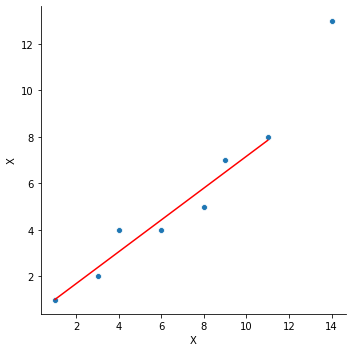

In [50]:
# Remove outlier\n",
x = df['X'][0:-1]
y = df['Y'][0:-1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

y_1 = intercept + slope * x

print(f'R-squared value is : {r_value}')
sns.relplot(x="X", y="Y", data=df)
sns.lineplot(x=x, y=y_1, color='red')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [51]:
# Your response here.
#Removiendo el último valor la correlación sube, aunque no significativamente porque la correlación ya está